# Лечение гипертонии

72 пациента проходили лечение от гипертонии. Для лечения использовались три вида лекарств, при этом их эффект изучался как при использовании специальной диеты, так и в её отсутствии; кроме того, в половине случаев применялась психотерапия. Данные — артериальное давление пациента по окончании лечения.

Требуется сравнить эффективность методов лечения гипертонии.

## Загрузим данные и посмотрим на них

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('hyper.txt', delimiter='\t')

In [3]:
data.head()

,biofeedback,diet,drug,pressure
0,present,absent,1,170
1,present,absent,1,175
2,present,absent,1,165
3,present,absent,1,180
4,present,absent,1,160


In [95]:
data.describe()

,drug,pressure
count,72.000000,72.000000
mean,2.000000,184.500000
std,0.822226,17.838872
min,1.000000,152.000000
25%,1.000000,170.750000
50%,2.000000,182.500000
75%,3.000000,198.250000
max,3.000000,228.000000


In [96]:
data.sample(10)

,biofeedback,diet,drug,pressure
9,present,present,1,152
64,absent,absent,3,224
3,present,absent,1,180
33,present,present,3,156
70,absent,present,3,179
18,present,present,2,164
32,present,present,3,183
4,present,absent,1,160
27,present,absent,3,170
66,absent,present,3,205


In [97]:
data['biofeedback'].describe()

count          72
unique          2
top       present
freq           36
Name: biofeedback, dtype: object

In [98]:
data['biofeedback'].unique()

array(['present', 'absent'], dtype=object)

### Трехфакторный дисперсионный анализ для пациентов

In [99]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [100]:
lm = ols('pressure ~ C(biofeedback) * C(diet) * C(drug)', data=data).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(biofeedback),1.0,2048.0,2048.000000,13.072340,6.150719e-04
C(diet),1.0,5202.0,5202.000000,33.204255,3.053308e-07
C(drug),2.0,3675.0,1837.500000,11.728723,5.018624e-05
C(biofeedback):C(diet),1.0,32.0,32.000000,0.204255,6.529374e-01
C(biofeedback):C(drug),2.0,259.0,129.500000,0.826596,4.424565e-01
C(diet):C(drug),2.0,903.0,451.500000,2.881915,6.381527e-02
C(biofeedback):C(diet):C(drug),2.0,1075.0,537.500000,3.430851,3.883423e-02
Residual,60.0,9400.0,156.666667,NaN,NaN


Значимые воздействия

In [101]:
table[table['PR(>F)'] < 0.05]

,df,sum_sq,mean_sq,F,PR(>F)
C(biofeedback),1.0,2048.0,2048.0,13.072340,6.150719e-04
C(diet),1.0,5202.0,5202.0,33.204255,3.053308e-07
C(drug),2.0,3675.0,1837.5,11.728723,5.018624e-05
C(biofeedback):C(diet):C(drug),2.0,1075.0,537.5,3.430851,3.883423e-02


#### Построим графики взаимодействий

$$X_{ijk} = \mu + \alpha_i + \beta_j + \gamma_{ij} + \varepsilon_{ijk},$$
$$i = 1, ..., K_1,\ j = 1, ..., K_2,\ k = 1, ..., n.$$

- $\mu$ -- общее среднее значение признака,
- $\alpha_i$ -- воздействие уровня $i$ фактора $f_1$,
- $\beta_j$ -- воздействие уровня $j$ фактора $f_2$,
- $\gamma_{ij}$ -- дополнительное воздействие комбинации уровней $i$ и $j$ факторов $f_1$ и $f_2$,
- $\varepsilon_{ijk}$ -- случайные независимые одинаково распределенные ошибки

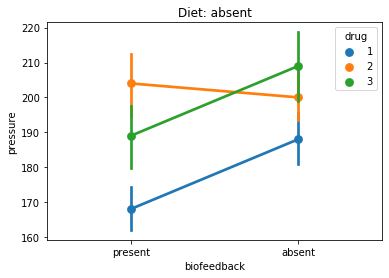

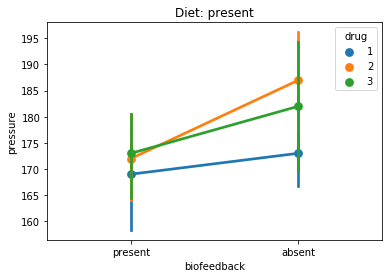

In [102]:
plt.title('Diet: absent')
sns.pointplot(x="biofeedback", y="pressure", data=data.loc[data['diet']=='absent'], hue='drug')

plt.show()
plt.title('Diet: present')
sns.pointplot(x="biofeedback", y="pressure", data=data.loc[data['diet']=='present'], hue='drug')

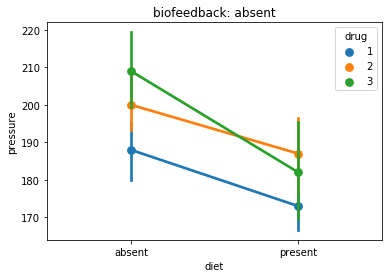

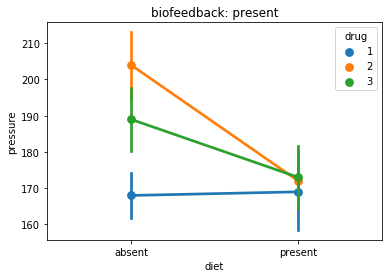

In [103]:
plt.title('biofeedback: absent')
sns.pointplot(x="diet", y="pressure", data=data.loc[data['biofeedback']=='absent'], hue='drug')

plt.show()
plt.title('biofeedback: present')
sns.pointplot(x="diet", y="pressure", data=data.loc[data['biofeedback']=='present'], hue='drug')

Тройное взаимодействие значимо, поэтому разделим выборку по одному из признаков.

### Двухфакторный дисперсионный анализ для пациентов, проходящих психотерапию

In [104]:
lm = ols('pressure ~  C(diet) * C(drug)',data=data.loc[data['biofeedback']=='present']).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(diet),1.0,2209.0,2209.000000,15.248504,0.000496
C(drug),2.0,2342.0,1171.000000,8.083295,0.001556
C(diet):C(drug),2.0,1634.0,817.000000,5.639669,0.008334
Residual,30.0,4346.0,144.866667,NaN,NaN


Есть значимое межфакторное взаимодействие.

#### Графики

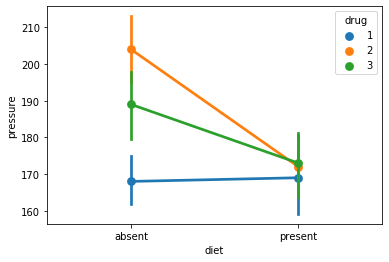

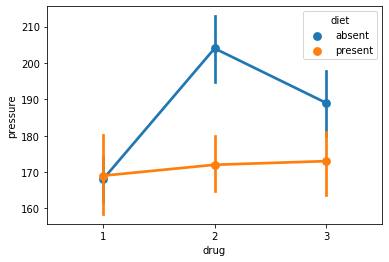

In [105]:
_ = sns.pointplot(x="diet", y="pressure", data=data.loc[data['biofeedback']=='present'], hue='drug')
plt.show()
_ = sns.pointplot(x="drug", y="pressure", data=data.loc[data['biofeedback']=='present'], hue='diet')

Поэтому снова поделим выборку.

### Однофакторный анализ для пациентов, проходящих психотерапию и сидящих на диете:

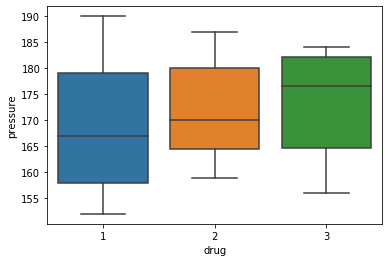

In [106]:
sns.boxplot(x='drug', y='pressure', data=data[(data['biofeedback']=='present') & (data['diet']=='present')])

In [107]:
lm =  ols('pressure ~ C(drug)',data=data.loc[(data['biofeedback']=='present') & (data['diet']=='present')]).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(drug),2.0,52.0,26.0,0.164141,0.850126
Residual,15.0,2376.0,158.4,NaN,NaN


Ожидаемый p-value: ```~0.850126```

### Однофакторный анализ для пациентов, проходящих психотерапию и не сидящих на диете:

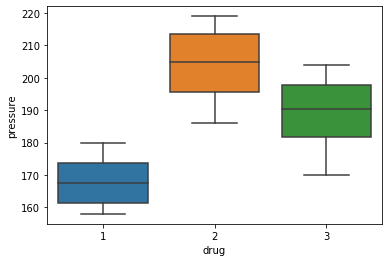

In [108]:
_ = sns.boxplot(x='drug', y='pressure', data=data[(data['biofeedback']=='present') & (data['diet']=='absent')])

In [109]:
lm =  ols('pressure ~ C(drug)',data=data.loc[(data['biofeedback']=='present') & (data['diet']=='absent')]).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(drug),2.0,3924.0,1962.000000,14.939086,0.000269
Residual,15.0,1970.0,131.333333,NaN,NaN


Ожидаемый p-value: ```~0.000269```

#### Исследуем различия в воздействии между группами

In [111]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data.loc[(data['biofeedback']=='present') & (data['diet']=='absent')]['pressure'],
                     data.loc[(data['biofeedback']=='present') & (data['diet']=='absent')]['drug'])
result = mc.tukeyhsd()

print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     36.0  0.001  18.8206 53.1794   True
     1      3     21.0 0.0163   3.8206 38.1794   True
     2      3    -15.0 0.0918 -32.1794  2.1794  False
-----------------------------------------------------


Препарат 1 значимо эффективнее двух других.

### Двухфакторный дисперсионный анализ для пациентов, не проходящих психотерапию:

In [112]:
lm = ols('pressure ~ C(diet) * C(drug)',data=data[data['biofeedback']=='absent']).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(diet),1.0,3025.0,3025.000000,17.956074,0.000198
C(drug),2.0,1592.0,796.000000,4.724970,0.016448
C(diet):C(drug),2.0,344.0,172.000000,1.020973,0.372422
Residual,30.0,5054.0,168.466667,NaN,NaN


Межфакторное взаимодействие незначимо:

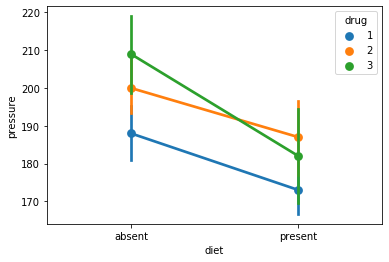

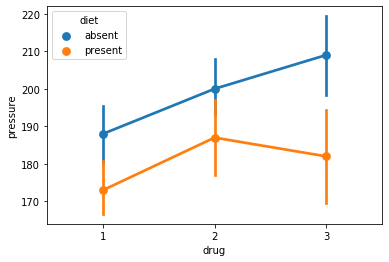

In [113]:
_ = sns.pointplot(x="diet", y="pressure", data=data[data['biofeedback']=='absent'], hue='drug')
plt.show()
_ = sns.pointplot(x="drug", y="pressure", data=data[data['biofeedback']=='absent'], hue='diet')

#### Исследуем попарные различия в воздействии каждого из лекарств в зависимости от диеты

In [115]:
subset = data[data.diet == 'absent']
mc = MultiComparison(subset['pressure'], subset['drug'])
result = mc.tukeyhsd()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     24.0  0.001   9.8936 38.1064   True
     1      3     21.0 0.0025   6.8936 35.1064   True
     2      3     -3.0 0.8504 -17.1064 11.1064  False
-----------------------------------------------------


In [116]:
subset = data[data.diet == 'present']
mc = MultiComparison(subset['pressure'], subset['drug'])
result = mc.tukeyhsd()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      8.5 0.2994  -5.3036 22.3036  False
     1      3      6.5 0.4892  -7.3036 20.3036  False
     2      3     -2.0    0.9 -15.8036 11.8036  False
-----------------------------------------------------


## Итого:

* если пациент не проходит психотерапию, соблюдение диеты приводит к значимому уменьшению давления при приёме любого из трёх препаратов;
* эффективность всех трёх препаратов неразличима для пациентов, сидящих на диете и проходящих психотерапию;
* для пациентов, проходящих психотерапию и не сидящих на диете, препарат 1 эффективнее в среднем примерно на 20 мм. рт. ст.
* Чтобы сделать другие возможные выводы (например, оценить эффекты психотерапии и эффект диеты для тех, кто проходит психотерапию), нужно разбить трёхфакторный анализ по двум другим признакам.

**Maxwell S.E., Delaney H.D. Designing Experiments and Analyzing Data: A Model Comparison Perspective. (1990). Глава 8, стр. 325.**